In [ ]:
# Лабораторная работа № 2
### вариант № 2   Лила.В.Я
### группа: РИМ-101211

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

##### Построение периодического сигнала, имеющего 2 разных периода:

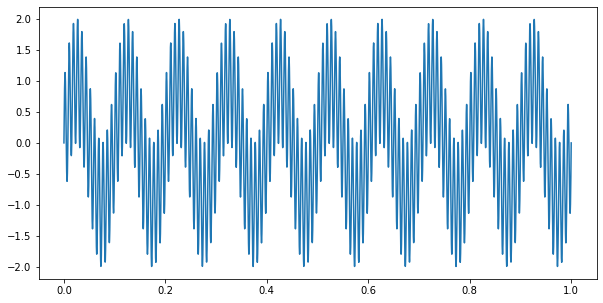

In [2]:
t = np.linspace(0, 1, 4096)
x1 = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*120*t)
plt.figure(figsize = (10, 5))
plt.plot(t, x1)
plt.show()

In [ ]:
##### Оценка его периодограммы и спектральной плотности мощности ряда с помощью метода Велша (Welch):

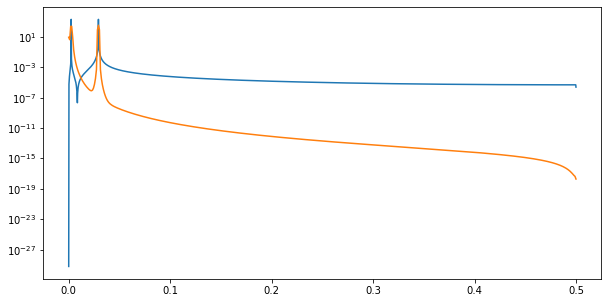

In [3]:
pd1, pdden1 = signal.periodogram(x1) # строим периодограмму
pdw1, pddenw1 = signal.welch(x1, nperseg = 1024)
plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1)
plt.semilogy(pdw1, pddenw1)
plt.show()

##### Создаем периодический сигнал с изломом частоты:

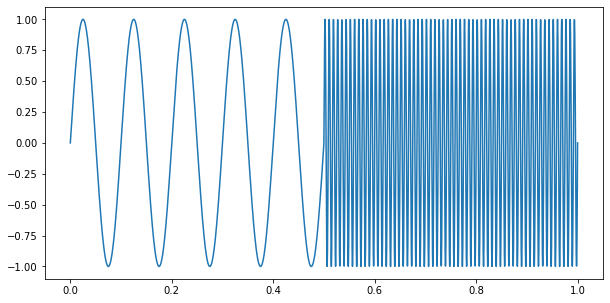

In [4]:
t = np.linspace(0, 1, 4096)
x2 = np.zeros(4096)
# Первая половина = 10гц
for i in range(0, len(t)//2):
    x2[i] = np.sin(2*np.pi*10*t[i]) 
    
# Вторая половина = 120гц
for i in range(len(t)//2, len(t)):
    x2[i] = np.sin(2*np.pi*120*t[i])
    
plt.figure(figsize = (10, 5))
plt.plot(t, x2)
plt.show()

##### Оцениваем его спектр:

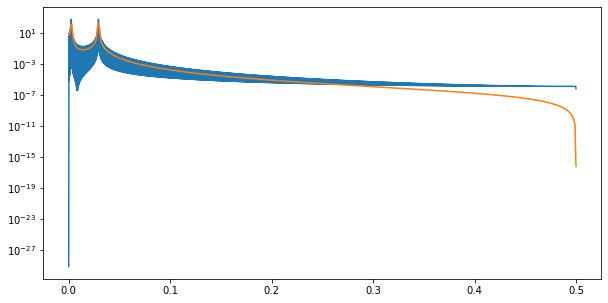

In [5]:
pd2, pdden2 = signal.periodogram(x2)
pdw2, pddenw2 = signal.welch(x2, nperseg = 1024)
plt.figure(figsize = (10, 5))
plt.semilogy(pd2, pdden2)
plt.semilogy(pdw2, pddenw2)
plt.show()

##### Строим спектры этих двух сигналов на одном изображении:

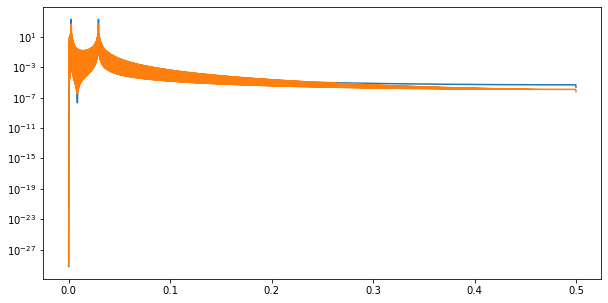

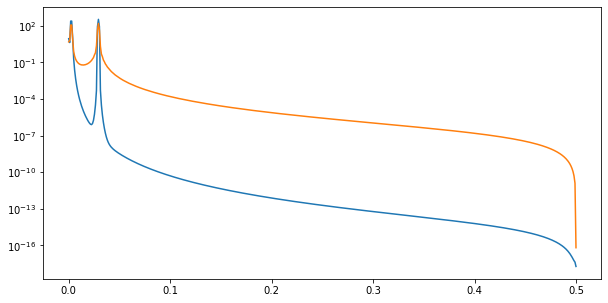

In [6]:
plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1)
plt.semilogy(pd2, pdden2)
plt.figure(figsize = (10, 5))
plt.semilogy(pdw1, pddenw1)
plt.semilogy(pdw2, pddenw2)
plt.show()

Насколько похожи между собой эти спектры, хотя исходные данные существенно  отличаются. Это связано с тем, что данные спектральные оценки усредняют периоды по времени, теряя зависимость частоты от времени, если она существовала.

##### Построим спектрограмму заданного ряда, чтобы вычислить его частотно-временные характеристики.

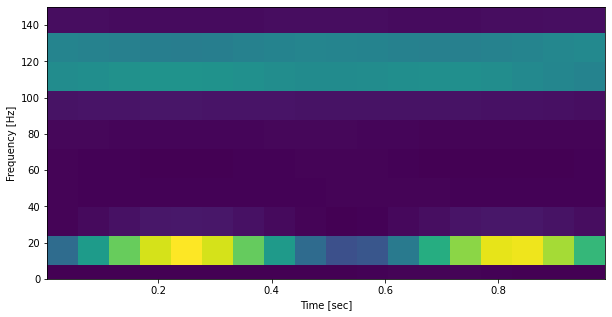

In [7]:
fs = 1/(t[1]-t[0]) # fs = 1/dt = N/T
f, tx, Sxx = signal.spectrogram(x1, fs) # возвращаем частоту от времени
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx, shading='auto') # цвет – интенсивность спектрограммы
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

Видим "картину", по которой можно различить две постоянные периодики в районе 10 и 120 Гц, но точность весьма низкая.

##### Изменим параметры сегментов спектрограммы для более ярко-выраженного результата:

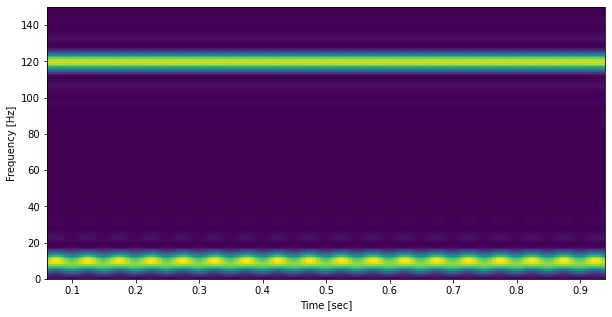

In [8]:
fs = 1/(t[1]-t[0]) # fs = 1/dt = N/T
f, tx, Sxx = signal.spectrogram(x1, fs, nperseg = 512, noverlap = 496, nfft=4096)
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx, shading='auto') # цвет – интенсивность спектрограммы
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

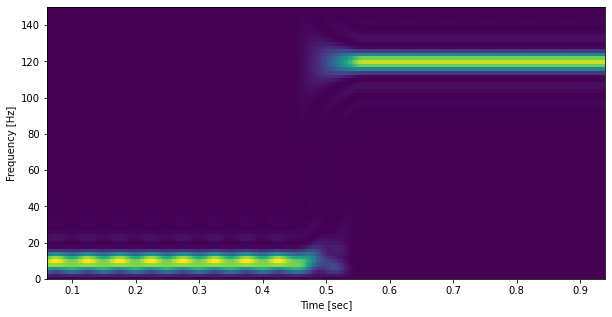

In [9]:
fs = 1/(t[1]-t[0]) # fs = 1/dt = N/T
f, tx, Sxx = signal.spectrogram(x2, fs, nperseg = 512, noverlap = 496, nfft=2048)
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx, shading='auto') # цвет – интенсивность спектрограммы
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

На спектограмме х1 видим два непрерывных сигнала.
На спектограмме х2 видим в первую половину времени одну частоту, во вторую половину времени - вторую частоту

##### Cоздадим временной ряд с ЛЧМ (линейной частотной модуляцией) в диапазоне от 50 до 150 Гц:

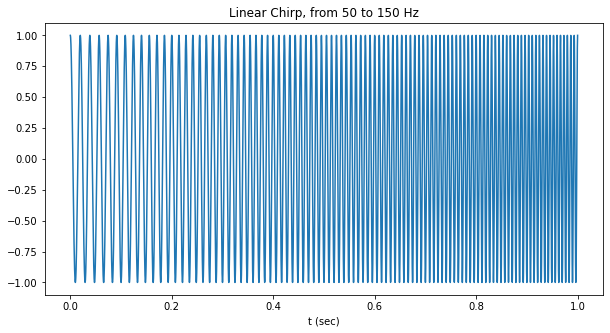

In [10]:
tx = np.linspace(0, 1, 8192) # временной отрезок от 0 до 1 сек
w = signal.chirp(tx, f0=50, f1=150, t1=1, method='linear')
# от 50 до 150 Гц за 1 секунду, ЛЧМ
plt.figure(figsize=(10, 5))
plt.plot(tx, w)
plt.title("Linear Chirp, from 50 to 150 Hz")
plt.xlabel('t (sec)')
plt.show()

##### Построим спектрограмму заданного ряда:

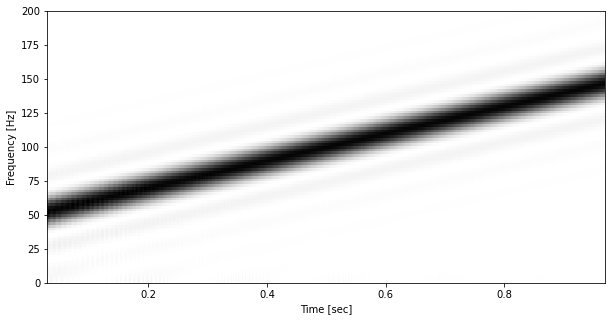

In [11]:
fs = 1/(tx[1]-tx[0]) # fs = 1/dt = N/T
f, t, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096)
# длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT = 4096
plt.figure(figsize = (10, 5))
plt.pcolormesh(t, f, Sxx, shading='auto', cmap='gray_r') # в оттенках серого цвета
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 200)
plt.xlabel('Time [sec]')
plt.show()

Полученная черно-белая картина спектрограммы хорошо
отражает линейную структуру частотной модуляции.

##### Преобразование Гильберта

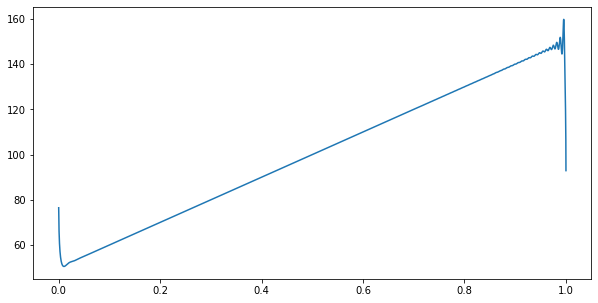

In [12]:
analytic_signal = signal.hilbert(w) # аналитический сигнал
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
# мгновенная фаза в развернутом непрерывном виде
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)
# мгновенная частота как производная от фазы, приведенная в Гц
plt.figure(figsize = (10, 5))
# из-за численного расчета производной массив мгновенной частоты будет меньше массива времени на одну точку:
plt.plot(tx[1:], instantaneous_frequency)
plt.show()

Полученный график имеет четко выраженную линейную форму
частоты от 50 до 150 Гц, за исключением краевых эффектов. Эти краевые искажения связаны с численным расчетом производной от мгновенной частоты и на практике для избавления от них полученный ряд сглаживают скользящим средним или линейной регрессионной кривой. Ну или просто отрезают значения по краям временного  интервала.

#### Построим зависимость частоты от времени для следующих модельных временных рядов через спектрограмму и преобразование Гильберта:

##### Ряд с линейной частотной модуляцией

In [13]:
def f(tx,w,fs): # создим функцию
    analytic_signal = signal.hilbert(w)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)
    plt.figure(figsize = (10, 5))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Преобразование Гильберта')
    plt.plot(tx[1:], instantaneous_frequency)
    # plt.show()
    f, t, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096)
    plt.figure(figsize = (10, 5))
    plt.pcolormesh(t, f, Sxx, shading='auto', cmap='gray_r')
    plt.ylabel('Frequency [Hz]')
    # plt.ylim(0, 200)
    plt.xlabel('Time [sec]')
    plt.title('Спектрограмма ВР')
    plt.show()

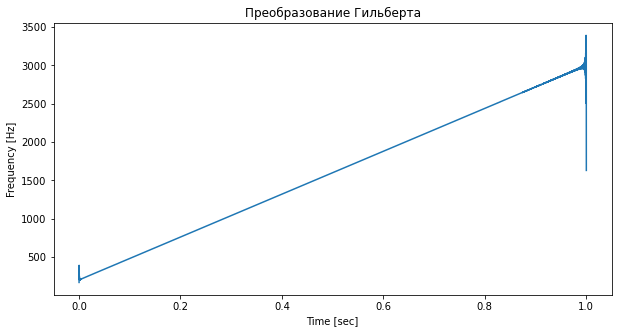

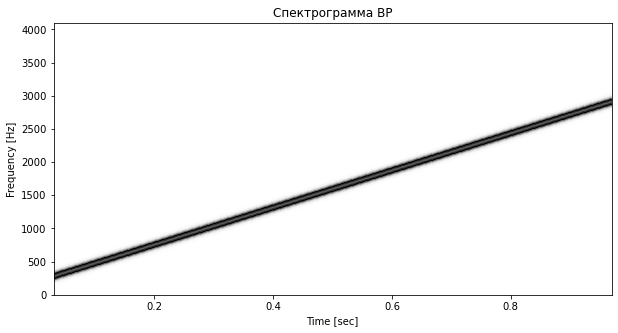

In [14]:

TX = np.linspace(0, 1, 8192) # ЛЧМ в большем диапазоне
W = signal.chirp(TX, f0=200, f1=3000, t1=1, method='linear')
FS = 1/(TX[1]-TX[0])
f(TX,W,FS)

###### Ряд с квадратичной частотной модуляцией:

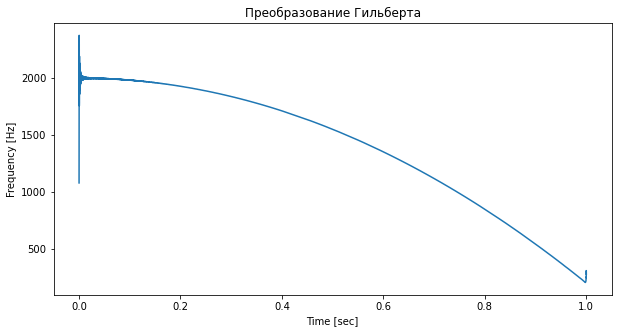

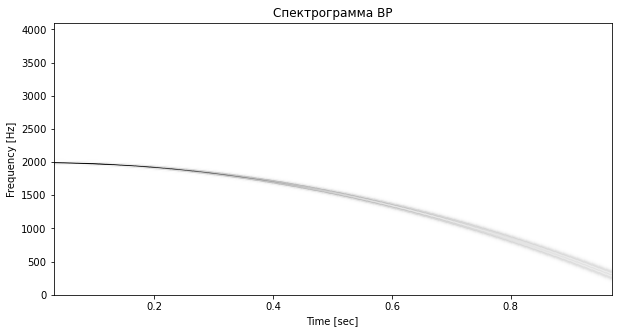

In [15]:
TX = np.linspace(0, 1, 8192)
W = signal.chirp(tx, f0=2000, f1=200, t1=1, method='quadratic')
FS = 1/(TX[1]-TX[0])
f(TX,W,FS)

###### Ряд с инверсной квадратичной частотной модуляцией:

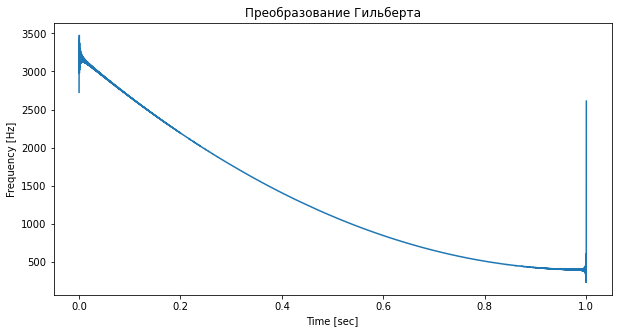

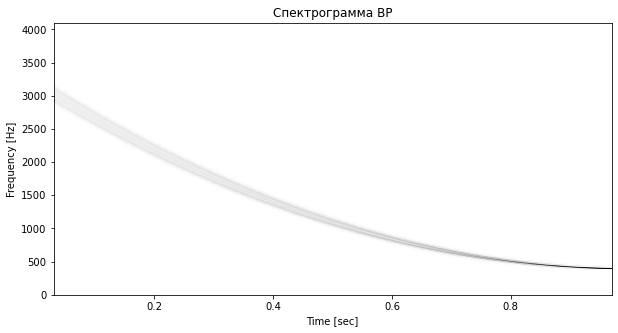

In [16]:
TX = np.linspace(0, 1, 8192)
W = signal.chirp(tx, f0=3200, f1=400, t1=1, method='quadratic', vertex_zero=False)
FS = 1/(TX[1]-TX[0])
f(TX,W,FS)

###### Ряд с логарифмической частотной модуляцией:

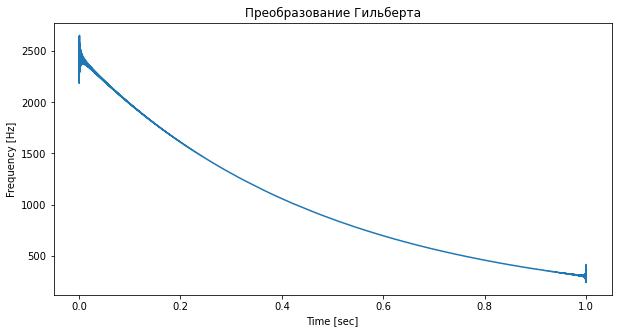

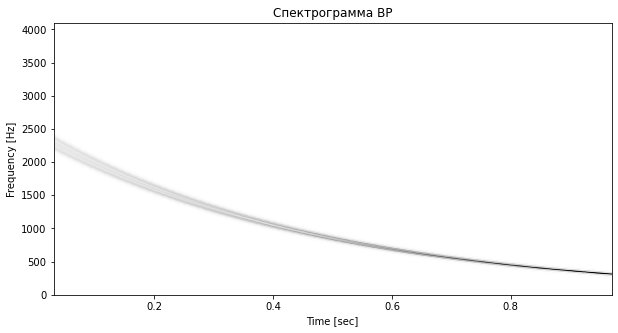

In [17]:
TX = np.linspace(0, 1, 8192)
W = signal.chirp(tx, f0=2450, f1=300, t1=1, method='logarithmic')
FS = 1/(TX[1]-TX[0])
f(TX,W,FS)

###### Ряд с гиперболической частотной модуляцией:

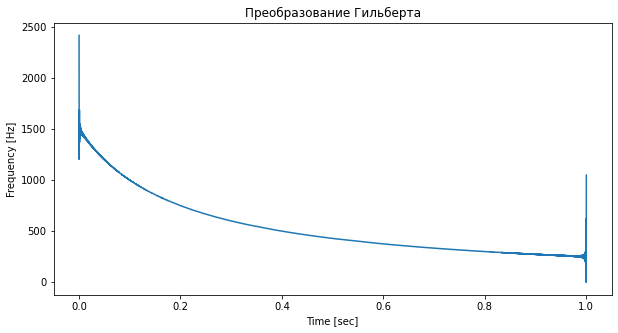

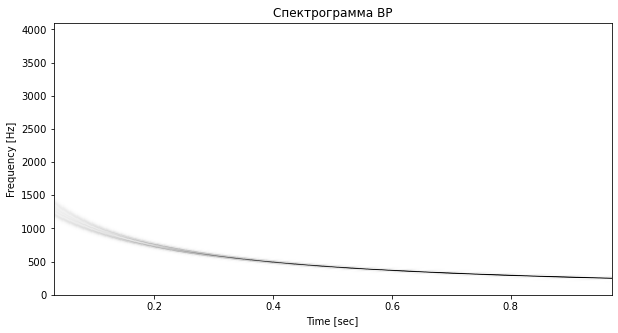

In [18]:
TX = np.linspace(0, 1, 8192)
W = signal.chirp(tx, f0=1500, f1=250, t1=1, method='hyperbolic')
FS = 1/(TX[1]-TX[0])
f(TX,W,FS)

###### Ряд с полиномиальной частотной модуляцией:

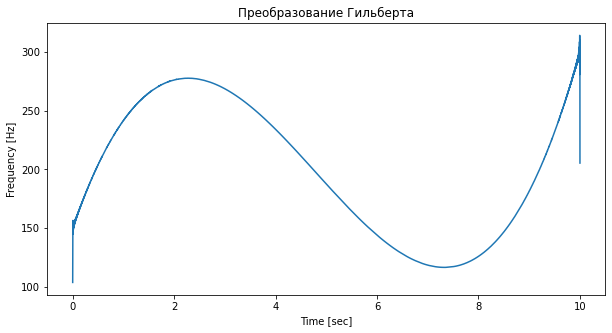

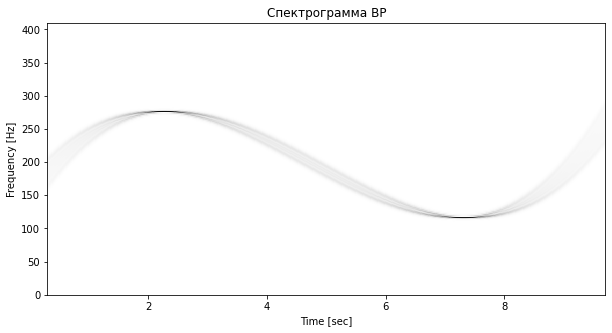

In [19]:
TX = np.linspace(0, 10, 8192)
p = np.poly1d([2.5, -36.0, 125.0, 150.0])
W = signal.sweep_poly(TX, p)
FS = 1/(TX[1]-TX[0])
f(TX,W,FS)

##### Ряд с частотной модуляцией другим гармоническим сигналом:

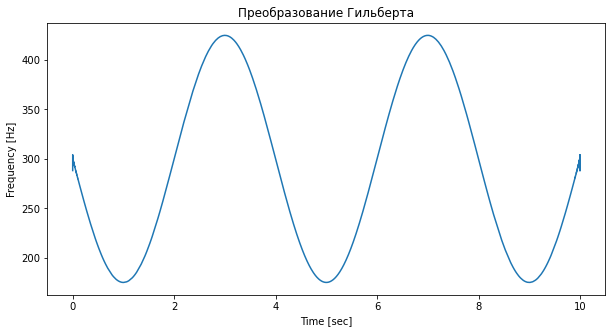

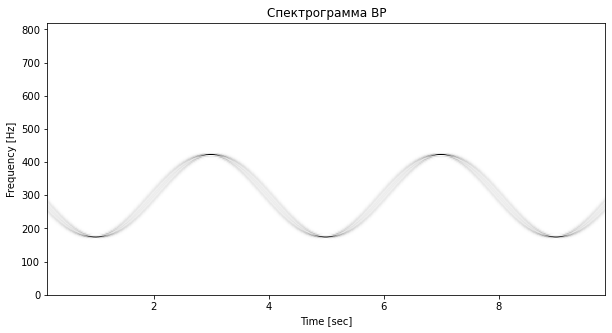

In [20]:
TX = np.linspace(0, 10, 2*8192)
mod = 500*np.cos(2*np.pi*0.25*TX)
W = 2 * np.sqrt(2) * np.sin(2*np.pi*300*TX + mod)
FS = 1/(TX[1]-TX[0])
f(TX,W,FS)

#### Временной ряд из 4 периодик без шума

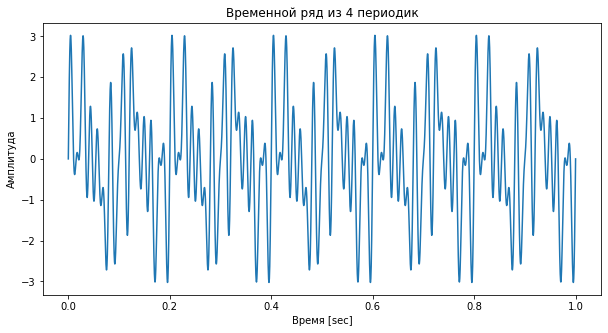

In [21]:
t = np.linspace(0, 1, 4096) 
x1 = np.sin(2*np.pi*10*t)+np.sin(2*np.pi*40*t)+np.sin(2*np.pi*50*t)+np.sin(2*np.pi*75*t)
plt.figure(figsize = (10, 5))
plt.title('Временной ряд из 4 периодик')
plt.xlabel('Время [sec]')
plt.ylabel('Амплитуда')
plt.plot(t, x1)
plt.show()

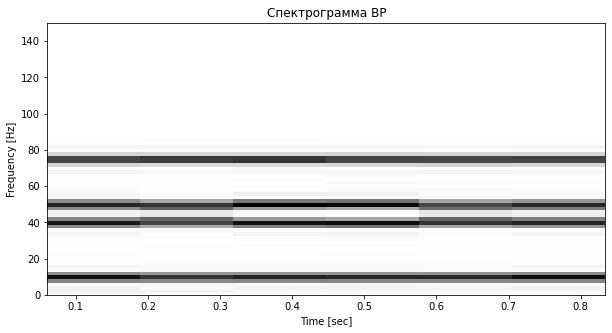

In [22]:
fs = 1/(t[1]-t[0]) 
f, tx, Sxx = signal.spectrogram(x1, fs, nperseg = 1024, noverlap = 496, nfft=2048)
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx, shading='auto', cmap='gray_r')
plt.ylabel('Frequency [Hz]')
plt.title('Спектрограмма ВР')
plt.ylim(0, 150)
plt.xlabel('Time [sec]')
plt.show()

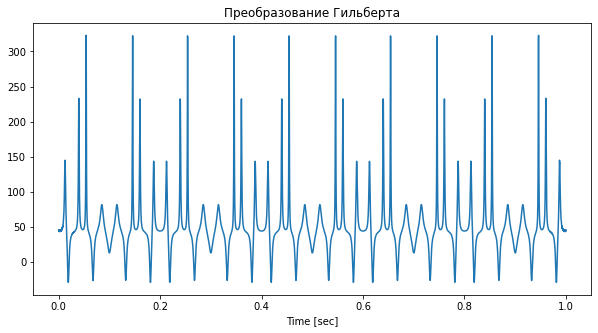

In [23]:
fs = 1/(t[1]-t[0]) 
analytic_signal = signal.hilbert(x1) 
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)
plt.figure(figsize = (10, 5))
plt.xlabel('Time [sec]')
plt.title('Преобразование Гильберта')
plt.plot(t[1:], instantaneous_frequency)
plt.show()

В случае с данным временным рядом из нескольких периодик
для Преобразования Гильберта получается неожиданный
результат – нечто совершенно не похожее ни коим образом на 4
разных, но постоянных периода. Связано это с тем, что сумма
гармоник трактуется через Преобразование Гильберта как единый
аналитический сигнал с некоторой сложной амплитудной
модуляцией (сумма синусов может быть записана как произведение
синуса на косинус). По этой причине, прежде чем применять метод
аналитического сигнала и расчета мгновенной частоты, исходный
временной ряд всегда сначала раскладывают в аддитивную сумму
компонент в разных частотных областях.

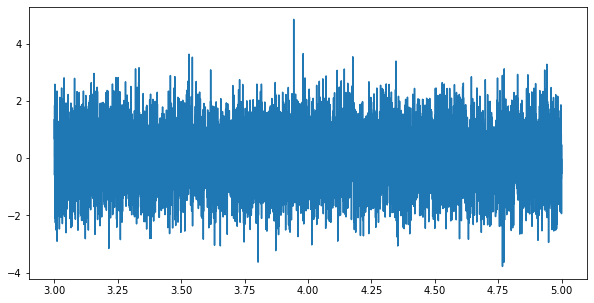

In [24]:
x = rand.randn(10000)
t = np.linspace(3, 5, num = 10000)
plt.figure(figsize = (10, 5))
plt.plot(t, x)
plt.show()

In [25]:
print(tsa.kpss(x)) # KPSS-test на стационарность

(0.1155976361583629, 0.1, 38, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


Более точный показатель, на который следует обратить внимание
– это p-value. Он, чаще всего, трактуется следующим образом: если
значение p-value меньше 0.05, то нулевая гипотеза отклоняется.
Если значение больше 0.05, то нулевая гипотеза принимается.
Наш показатель p-value равен 0,1 - значит нулевая теория принимается

Внесем явную нестационарность в этот ряд:

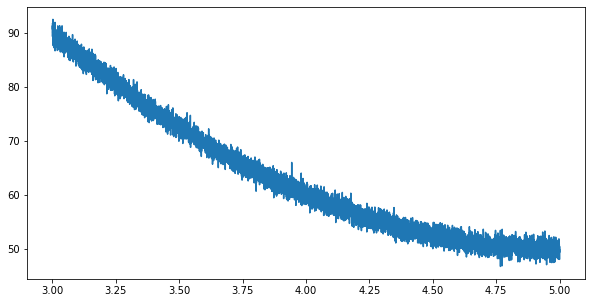

In [26]:
xv=x+(10*t**2-100*t+300)
plt.figure(figsize = (10, 5))
plt.plot(t, xv)
plt.show()

In [27]:
print(tsa.kpss(xv)) # KPSS-test на стационарность

(24.520822940730206, 0.01, 38, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


Значение p-value меньше 0.05 (у нас оно 0,01), то нулевая гипотеза отклоняется.

#### Реализация критерия Фишера для исходного ВР

In [28]:
F,p=stats.f_oneway(x[0:len(x)//2],x[len(x)//2:len(x)])
print('F_statistic =',F)
print('p_value =',p)
print('Дисперсия первой половины исходного ВР',np.var(x[0:len(x)//2]))
print('Дисперсия второй половины исходного ВР',np.var(x[len(x)//2:len(x)]))

F_statistic = 2.333117719354955
p_value = 0.12667962848695
Дисперсия первой половины исходного ВР 1.0027096585624053
Дисперсия второй половины исходного ВР 1.006112529169373


#### Реализация критерия Фишера для модифицированного ВР

In [29]:
F,p=stats.f_oneway(xv[0:len(xv)//2],x[len(xv)//2:len(xv)])
print('F_statistic =',F)
print('p_value =',p)
print('Дисперсия первой половины модифицированного ВР',np.var(xv[0:len(xv)//2]))
print('Дисперсия второй половины модифицированного ВР',np.var(xv[len(xv)//2:len(xv)]))

F_statistic = 346063.96752279537
p_value = 0.0
Дисперсия первой половины модифицированного ВР 76.61620630139485
Дисперсия второй половины модифицированного ВР 10.001857825815092


p_value исходного ВР много больше 0,05, значит две половинки исходного ВР имеют схожие дисперсии.
p_value модифицированного ВР равен 0, значит две половинки модифицированного ВР имеют дисперсии отличающиеся во много раз (другими словами, две половинки модифицированного ВР абсолютно различны).

#### Проверка с помощью критерия Стьюдента двух половинок исходного ВР на соответствие мат. ожиданий

In [30]:
F,p=stats.ttest_ind(x[0:len(x)//2],x[len(x)//2:len(x)])
print('t_statistic =',F)
print('p_value =',p)
print('Мат. ожидание первой половины исходного ВР',np.mean(x[0:len(x)//2]))
print('Мат. ожидание второй половины исходного ВР',np.mean(x[len(x)//2:len(x)]))

t_statistic = -1.5274546537802536
p_value = 0.12667962848659872
Мат. ожидание первой половины исходного ВР -0.011490114147153572
Мат. ожидание второй половины исходного ВР 0.019129344347303477


#### Проверка с помощью критерия Стьюдента двух половинок модифицированного ВР на соответствие мат. ожиданий

In [31]:
F,p=stats.ttest_ind(xv[0:len(xv)//2],xv[len(xv)//2:len(xv)])
print('t_statistic =',F)
print('p_value =',p)
print('Мат. ожидание первой половины модифицированного ВР',np.mean(xv[0:len(xv)//2]))
print('Мат. ожидание второй половины модифицированного ВР',np.mean(xv[len(xv)//2:len(xv)]))

t_statistic = 151.72090447490623
p_value = 0.0
Мат. ожидание первой половины модифицированного ВР 73.32351005253618
Мат. ожидание второй половины модифицированного ВР 53.352129311010636


p_value исходного ВР много больше 0,05, значит две половинки исходного ВР имеют схожие мат. ожидания.
p_value модифицированного ВР равен 0, значит две половинки модифицированного ВР имеют отличающиеся мат. ожидания.